# Regression for Used Car Prices in United States


## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.

In [1]:
# setup imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random



In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))

In [5]:
dataset_path = "craigslist_sampled_cleaned_2023_03_05_19_07_36.csv"
target_col = 'price'

In [6]:
# load dataset
orig_df = pd.read_csv(dataset_path)
df = orig_df.copy()
# show a sample for sanity check
df.head()

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,34590.0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
1,16590.0,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.0,clean,other,fwd,full-size,sedan,red,al
2,7800.0,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.0,clean,manual,4wd,full-size,sedan,white,al
3,27995.0,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.0,clean,automatic,4wd,full-size,sedan,white,al
4,500.0,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,4wd,full-size,bus,green,al


In [7]:
# split into input data and output values
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

show_heading("X", size=2)
display(X_all)
show_heading("y", size=2)
display(y_all)

X

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.000000,clean,other,4wd,full-size,pickup,silver,al
1,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.000000,clean,other,fwd,full-size,sedan,red,al
2,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.000000,clean,manual,4wd,full-size,sedan,white,al
3,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.000000,clean,automatic,4wd,full-size,sedan,white,al
4,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.000000,clean,other,4wd,full-size,bus,green,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,2018.0,ford,ecosport titanium awd,good,4 cylinders,gas,38450.000000,salvage,automatic,fwd,full-size,SUV,black,wy
4030,2002.0,ford,f 350,good,6 cylinders,diesel,284097.166778,clean,manual,4wd,full-size,sedan,white,wy
4031,2012.0,mazda,mx-5 miata grand touring,good,6 cylinders,gas,29993.000000,clean,other,rwd,full-size,other,silver,wy
4032,2005.0,honda,civic,good,6 cylinders,gas,236787.000000,clean,automatic,4wd,full-size,coupe,white,wy


y

0       34590.0
1       16590.0
2        7800.0
3       27995.0
4         500.0
         ...   
4029     8550.0
4030     6500.0
4031    19990.0
4032     4277.0
4033     7477.0
Name: price, Length: 4034, dtype: float64

In [8]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [9]:
# determine types of columns
numeric_cols = X_all.select_dtypes(include=['int', 'float']).columns
cat_cols = X_all.select_dtypes(include=['object']).columns
bool_cols = X_all.select_dtypes(include=['bool']).columns

show_heading("Column Types")

for col in X_all.columns:
    print(f"Column '{col}' dtype={X_all[col].dtype}")

print("numeric_cols:", numeric_cols)
print("cat_cols:", cat_cols)
print("bool_cols:", bool_cols)

all_cols = set()
all_cols = all_cols.union(set(numeric_cols))
all_cols = all_cols.union(set(cat_cols))
all_cols = all_cols.union(set(bool_cols))

check_cols = set(X_all.columns)

if all_cols != check_cols:
    print("ERROR! missing columns")
else:
    print("Column typing done.")

all_cols

Column Types

Column 'year' dtype=float64
Column 'make' dtype=object
Column 'model' dtype=object
Column 'condition' dtype=object
Column 'cylinders' dtype=object
Column 'fuel' dtype=object
Column 'odometer' dtype=float64
Column 'title_status' dtype=object
Column 'transmission' dtype=object
Column 'drive' dtype=object
Column 'size' dtype=object
Column 'type' dtype=object
Column 'paint_color' dtype=object
Column 'state' dtype=object
numeric_cols: Index(['year', 'odometer'], dtype='object')
cat_cols: Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
bool_cols: Index([], dtype='object')
Column typing done.


{'condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'model',
 'odometer',
 'paint_color',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'year'}

In [10]:
# We are using category_encoders package for one-hot encoding.
# https://contrib.scikit-learn.org/category_encoders/

# uncomment and run this if needed.
!pip install category_encoders

In [11]:
# TODO: cleanup testing out one hot
#enc = preprocessing.OneHotEncoder()
#enc.fit(X)

import category_encoders as ce

In [12]:
# encode the categorical variables as one-hot
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols,use_cat_names=True)
# X_all = one_hot_enc.fit_transform(X_all)
# X_all.head()

In [13]:
# normalize the numerical columns
from sklearn.preprocessing import StandardScaler

def normalize_numeric_cols(df):
    
    for col in numeric_cols:
        # TODO: is this the kind of scalar we want?
        scaler = StandardScaler()

        scaler.fit(np.array(df[col]).reshape(-1,1))
        df[col] = scaler.transform(np.array(df[col]).reshape(-1,1))
    
    return df


In [14]:
# normalize_numeric_cols(X_all)
# X_all[numeric_cols]

In [15]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=193)


In [16]:
# # try a model to see how it works as a baseline
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
# rf_model = RandomForestRegressor(max_depth=10)
# rf_model.fit(X_train, y_train)

In [17]:
# predict_train = rf_model.predict(X_train)
# predict_test  = rf_model.predict(X_test)

In [18]:
# print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
# print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

In [19]:
# plt.figure(figsize=(20,4))
# feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
# feat_importances.nlargest(6).plot(kind='barh');

In [20]:
# do that over as a pipeline

In [77]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [27]:
# encode the categorical variables as one-hot
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols,use_cat_names=True)
# X_all = one_hot_enc.fit_transform(X_all)
# X_all.head()

In [28]:
# TODO: try ("selector", SelectPercentile(chi2, percentile=50)),


pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols)
                                ])

In [88]:
# Setup pipelines for comparison
linear_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('linear', LinearRegression())
                                 ])

# does not directly fit successfully 
# ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
#                                  ('random_forest', Ridge(alpha=1, solver="cholesky"))
#                                  ])
ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('ridge_sgd', SGDRegressor(penalty="l2"))
                                 ])

lasso_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('lasso_sgd', SGDRegressor(penalty="l1"))
                                 ])


rf_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=191))
                                 ])


In [89]:
from sklearn.model_selection import cross_validate

In [90]:

scoring = "neg_mean_absolute_percentage_error"
n_cv_folds = 3

linear_result = cross_validate(linear_pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
print("Linear")
display(linear_result)

print("Ridge")
ridge_result = cross_validate(ridge_pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
display(ridge_result)

print("Lasso")
lasso_result = cross_validate(lasso_pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
display(lasso_result)


print("RandomForest")
rf_result = cross_validate(rf_pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
display(rf_result)

Linear


{'fit_time': array([0.06473088, 0.04735589, 0.05520892]),
 'score_time': array([0.00452304, 0.00450921, 0.004076  ]),
 'test_score': array([-217.16682612,  -63.3823735 ,  -53.00321631])}

Ridge


/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'fit_time': array([0.119241  , 0.06121016, 0.08636379]),
 'score_time': array([0.00504994, 0.00415015, 0.00449896]),
 'test_score': array([-217.17916664,  -68.60081598,  -52.77147053])}

Lasso


{'fit_time': array([0.1281929 , 0.16533208, 0.23723769]),
 'score_time': array([0.00460815, 0.00431299, 0.00406718]),
 'test_score': array([-214.89374267,  -66.21526086,  -52.54494217])}

RandomForest


{'fit_time': array([1.08385897, 1.081002  , 1.12176991]),
 'score_time': array([0.01326418, 0.01308298, 0.01443005]),
 'test_score': array([-228.76801843,  -51.3128405 ,  -64.22999875])}

In [91]:
model_pipeline = lasso_pipeline


In [92]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('lasso_sgd', SGDRegressor(penalty='l1'))])

In [93]:
predict_train = model_pipeline.predict(X_train)
predict_test = model_pipeline.predict(X_test)

In [94]:
print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

RMSE of train data:  7280.401329875661
RMSE of test data:  8877.219683228866


In [104]:
print("model score: %.3f" % model_pipeline.score(X_test, y_test))

from sklearn.metrics import r2_score
predictions = model_pipeline.predict(X_test)
print (r2_score(y_test, predictions))


model score: 0.581
0.5814883003726563


In [102]:
#Display some prediction samples
samples = X_test.copy()
samples[target_col] = y_test
#pd.concat([y_test, X_test],axis=0)
samples['predicted_price'] = predictions

display(samples)


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,29929.228957
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,20844.839021
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,29297.993213
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,6177.155359
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,-3234.789652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,27540.679423
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,18762.352575
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,34396.929737
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,6300.364143


2211    28561.0
2720     8500.0
2153     8900.0
3969     5950.0
3363     9500.0
         ...   
3914    22995.0
1639    14450.0
35      29990.0
2674     1095.0
820     35990.0
Name: price, Length: 807, dtype: float64

Residual Diagram

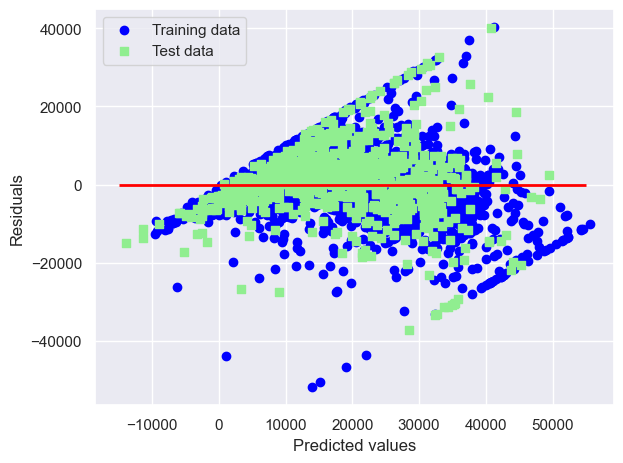

In [111]:
show_heading("Residual Diagram")

plt.scatter(
    predict_train,
    predict_train - y_train,
    c='blue',
    marker='o',
    label='Training data')

plt.scatter(
    predict_test,
    predict_test - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-15000, xmax=55000, lw=2, color='red')
#plt.xlim([-10, 50])
plt.tight_layout()
plt.show()



In [96]:
# TODO: save the model(s)

import joblib
#joblib.dump(model, './rf_model.pkl')

# load the model somewhere else
# In other notebooks 
#model = joblib.load('PATH/TO/rf_model.pkl')
#new_prediction = model.predict(new_data)